In [177]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head()

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [178]:
#Filter
all_df = data_set_df.loc[(data_set_df["District name"]=="Connecticut")]
#Reduce
all_reduced_df = all_df[["District name", "Student group", "2021-2022 student count - year to date"]]
all_reduced_df


,District name,Student group,2021-2022 student count - year to date
0,Connecticut,All Students,500285
1,Connecticut,Students Experiencing Homelessness,1814
2,Connecticut,Students With Disabilities,78417
3,Connecticut,Free Meal Eligible,168984
4,Connecticut,Reduced Price Meal Eligible,29905
5,Connecticut,Free/Reduced Price Meal Eligible,198889
6,Connecticut,English Learners,43571
7,Connecticut,All other races,48700
8,Connecticut,Black or African American,63099
9,Connecticut,Hispanic/Latino of any race,146298


In [179]:
percent_yes=[]
percent_no={}
for i in all_reduced_df["2021-2022 student count - year to date"]:
    percent_yes.append(i)
    
    
percent_yes

[500285,
 1814,
 78417,
 168984,
 29905,
 198889,
 43571,
 48700,
 63099,
 146298,
 242188,
 241106,
 248239]

In [180]:
reduced = all_reduced_df.iloc[0][2]
reduced

500285

In [181]:
#Define Variables
reduced = all_reduced_df.iloc[0][2]
disabilities = all_reduced_df.iloc[2][2]
no_disabilities = reduced - disabilities
fr = all_reduced_df.iloc[5][2]
no_fr = reduced - fr
ell = all_reduced_df.iloc[6][2]
no_ell = reduced - ell
black = all_reduced_df.iloc[8][2]
no_black = reduced-black
his = all_reduced_df.iloc[9][2]
no_his = reduced-his
white = all_reduced_df.iloc[10][2]
no_white = reduced - white
no_needs = all_reduced_df.iloc[11][2]
needs = reduced - no_needs

#Find Percents and Define as variables
disabilities_percent = disabilities/reduced+100
no_disabilities_percent = 100-disabilities_percent
fr_percent = fr/reduced*100
no_fr_percent = 100 - fr_percent
ell_percent = ell/reduced*100
no_ell_percent = 100-ell_percent
black_percent = black/reduced*100
no_black_percent = 100-black_percent
his_percent = his/reduced*100
no_his_percent = 100-his_percent
white_percent = white/reduced*100
no_white_percent = 100-white_percent
needs_percent = needs/reduced*100
no_needs_percent = 100-needs_percent

#Test Print
all_percent = ell_percent+no_ell_percent
print(disabilities, no_ell_percent, all_percent)

78417 91.29076426436932 100.0


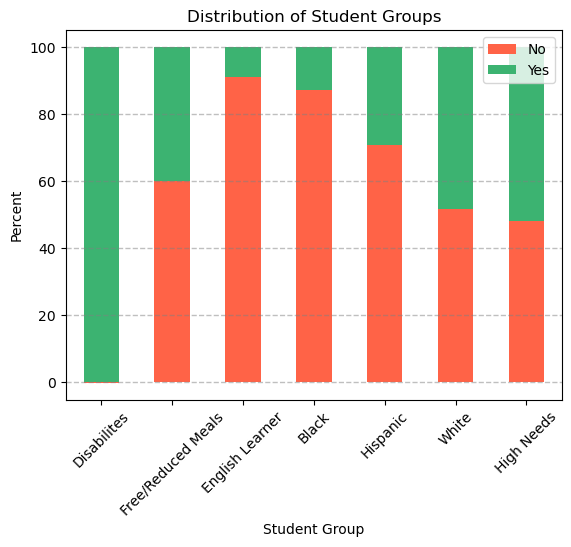

In [182]:
#Stacked Bar Graph
plotdata=pd.DataFrame({
    "No":[no_disabilities_percent, no_fr_percent, no_ell_percent, no_black_percent, 
          no_his_percent, no_white_percent, no_needs_percent],
    "Yes":[disabilities_percent, fr_percent, ell_percent, black_percent, his_percent, 
           white_percent, needs_percent]
        
    },
    index = ["Disabilites", "Free/Reduced Meals", "English Learner", "Black", "Hispanic", 
             "White", "High Needs"])
plotdata.plot(rot=45, kind="bar", stacked = True, color={"No" : "tomato", "Yes": 
                                                         "mediumseagreen"})
plt.title("Distribution of Student Groups")
plt.xlabel("Student Group")
plt.ylabel("Percent")
plt.grid(color="gray", linestyle="--", linewidth=1, axis="y", alpha=0.5)

#Save image
plt.savefig("Images/StackedBar.png", bbox_inches="tight")

#Plot
plt.show()

In [184]:
# Pie chart
#Recall data frame
all_reduced_df

#Remove All students row
all_reduced_df.drop(0)


,District name,Student group,2021-2022 student count - year to date
1,Connecticut,Students Experiencing Homelessness,1814
2,Connecticut,Students With Disabilities,78417
3,Connecticut,Free Meal Eligible,168984
4,Connecticut,Reduced Price Meal Eligible,29905
5,Connecticut,Free/Reduced Price Meal Eligible,198889
6,Connecticut,English Learners,43571
7,Connecticut,All other races,48700
8,Connecticut,Black or African American,63099
9,Connecticut,Hispanic/Latino of any race,146298
10,Connecticut,White,242188


In [185]:
#Reduce to race
race_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="All other races") |
                            (all_reduced_df["Student group"]=="Black or African American") |
                             (all_reduced_df["Student group"]=="Hispanic/Latino of any race") |
                             (all_reduced_df["Student group"]=="White")]

race_df

,District name,Student group,2021-2022 student count - year to date
7,Connecticut,All other races,48700
8,Connecticut,Black or African American,63099
9,Connecticut,Hispanic/Latino of any race,146298
10,Connecticut,White,242188


In [186]:
#Make lists for pie chart
student_group = []
student_count = []

#For loop to append to lists
for item in race_df["2021-2022 student count - year to date"]:
    student_count.append(item)
for group in race_df["Student group"]:
    student_group.append(group)
    
#Preview
student_count

[48700, 63099, 146298, 242188]

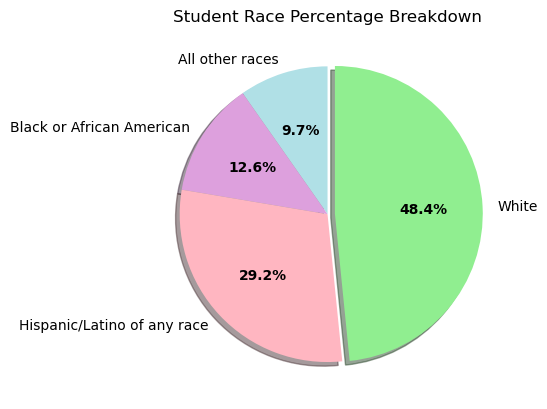

In [187]:
#Races Piechart

#Labels
labels = student_group

#Values
values = student_count

#Colors
colors = ["powderblue", "plum", "lightpink", "lightgreen"]

#Explode
explode = (0, 0, 0, 0.05)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)
plt.setp(autopcts, color='black', fontweight='bold')

#plt.pie(values, explode=explode, labels=labels, colors=colors,
      # autopct="%1.1f%%", shadow=True, startangle=90)
#plt.legend(labels, loc="lower right")
plt.title("Student Race Percentage Breakdown")

plt.savefig("Images/RacesPie.png", bbox_inches="tight")

plt.show()

In [188]:
#High Needs Pieplot
#Recall data set
all_reduced_df

#Reduce to race
needs_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="Students With High Needs") |
                            (all_reduced_df["Student group"]=="Students Without High Needs")]

needs_df

,District name,Student group,2021-2022 student count - year to date
11,Connecticut,Students Without High Needs,241106
12,Connecticut,Students With High Needs,248239


In [189]:
#Make lists for pie chart
student_group_needs = []
student_count_needs = []

#For loop to append to lists
for item in needs_df["2021-2022 student count - year to date"]:
    student_count_needs.append(item)
for group in needs_df["Student group"]:
    student_group_needs.append(group)
    

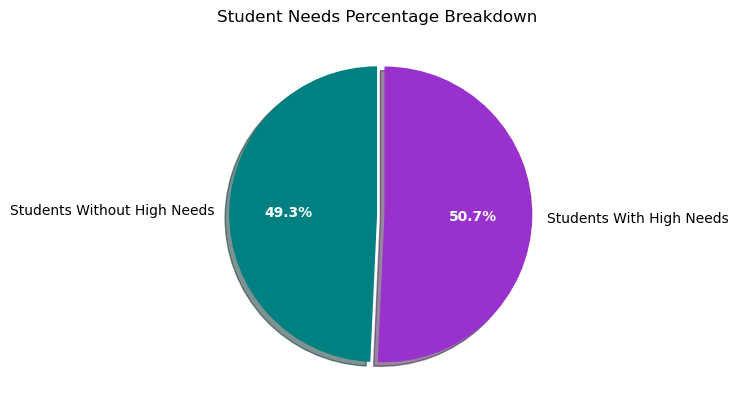

In [190]:
#Need Piechart

#Labels
labels = student_group_needs

#Values
values = student_count_needs

#Colors
colors = ["teal", "darkorchid"]

#Explode
explode = (0, 0.05)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)
plt.setp(autopcts, color='white', fontweight='bold')

#plt.pie(values, explode=explode, labels=labels, colors=colors,
      # autopct="%1.1f%%", shadow=True, startangle=90)
#plt.legend(labels, loc="lower right")
plt.title("Student Needs Percentage Breakdown")

plt.savefig("Images/NeedsPie.png", bbox_inches="tight")

plt.show()

In [195]:
#FR Breakdown Pieplot

#Add rows to find amount not
all_students = all_reduced_df.iloc[0][2]
fr = all_reduced_df.iloc[5][2]
not_fr = all_students - fr

#Add row to data frame
all_reduced_df.loc[len(all_reduced_df.index)] = ["Connecticut", "Not Free/Reduced Price Meal Eligible", not_fr]


,District name,Student group,2021-2022 student count - year to date
0,Connecticut,All Students,500285
1,Connecticut,Students Experiencing Homelessness,1814
2,Connecticut,Students With Disabilities,78417
3,Connecticut,Free Meal Eligible,168984
4,Connecticut,Reduced Price Meal Eligible,29905
5,Connecticut,Free/Reduced Price Meal Eligible,198889
6,Connecticut,English Learners,43571
7,Connecticut,All other races,48700
8,Connecticut,Black or African American,63099
9,Connecticut,Hispanic/Latino of any race,146298


In [214]:
#Reduce Data Frame
fr_reduced_df = all_reduced_df.loc[(all_reduced_df["Student group"]=="Free/Reduced Price Meal Eligible") |
                                  (all_reduced_df["Student group"]=="Not Free/Reduced Price Meal Eligible")]

#Remove extra rows
fr_reduced_df_1 = fr_reduced_df.drop(index=[14, 15, 16, 17])

fr_reduced_df_1

,District name,Student group,2021-2022 student count - year to date
5,Connecticut,Free/Reduced Price Meal Eligible,198889
13,Connecticut,Not Free/Reduced Price Meal Eligible,301396


In [215]:
#Make lists for pie chart
student_group_fr = []
student_count_fr = []

#For loop to append to lists
for item in fr_reduced_df_1["2021-2022 student count - year to date"]:
    student_count_fr.append(item)
for group in fr_reduced_df_1["Student group"]:
    student_group_fr.append(group)
    

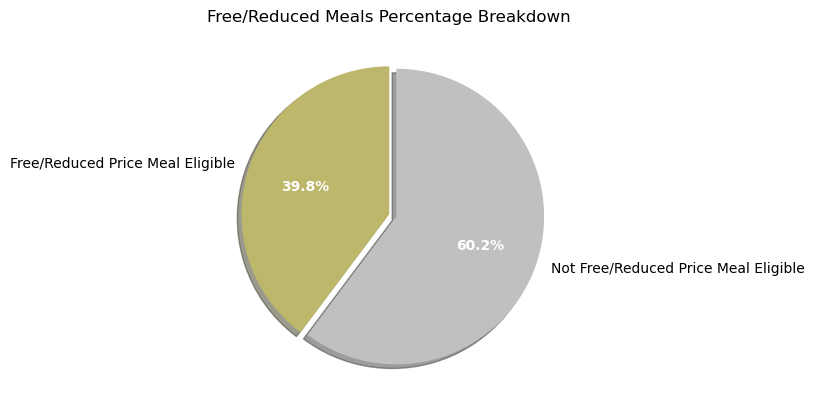

In [216]:
#Need Piechart

#Labels
labels = student_group_fr

#Values
values = student_count_fr

#Colors
colors = ["darkkhaki", "silver"]

#Explode
explode = (0, 0.05)

#Plot with percents
fig1, ax1 = plt.subplots()
_, _, autopcts = ax1.pie(values,explode= explode, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90, colors=colors)
plt.setp(autopcts, color='white', fontweight='bold')

#plt.pie(values, explode=explode, labels=labels, colors=colors,
      # autopct="%1.1f%%", shadow=True, startangle=90)
#plt.legend(labels, loc="lower right")
plt.title("Free/Reduced Meals Percentage Breakdown")

plt.savefig("Images/FRPie.png", bbox_inches="tight")

plt.show()